Поиск аномаоий при помощи гауссовой модели (гауссовой смеси)

Gaussian Mixture as a tool to detect anomalies

In [4]:
# import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mat = loadmat("ex8data1.mat")
X = mat["X"]
Xval = mat["Xval"]
yval = mat["yval"]

Text(0, 0.5, 'Throughput (mb/s)')

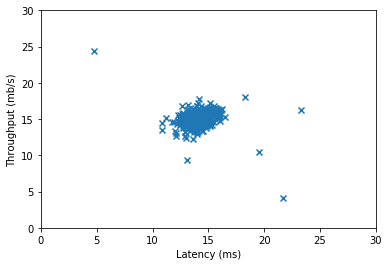

In [5]:
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [9]:
# Оценка параметров Гауссианы
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var

mu, sigma2 = estimateGaussian(X)

In [11]:
# Многомерное Гауссовое распределение
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

p = multivariateGaussian(X, mu, sigma2)

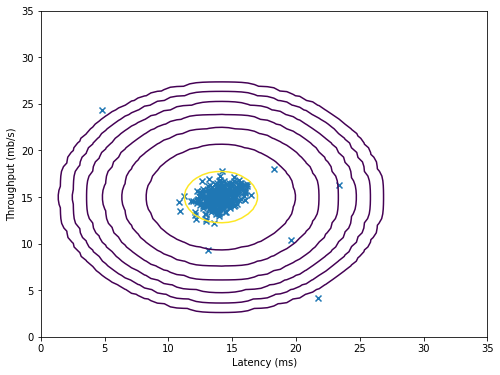

In [47]:
# После определения параметров Гауссианы и оценки плотности данных -- строим визуализацию
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array(np.arange(-20,0,3,dtype=np.float))

plt.contour(X1,X2,p2.reshape(X1.shape),contour_level)
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.show()

In [53]:
# Устанавливаем порог для определения Аномалии.
def selectThreshold(yval, pval):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set: 0.8750000000000001


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


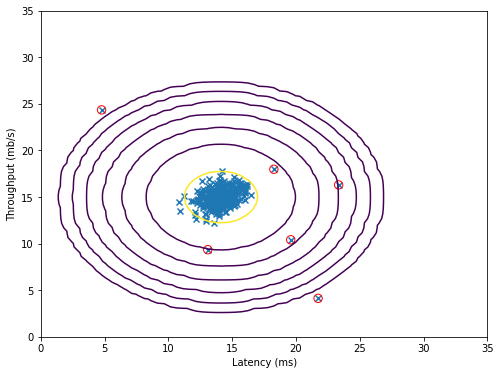

In [54]:
plt.figure(figsize=(8,6))

# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")

# potting of contour
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array(np.arange(-20,0,3,dtype=np.float))
plt.contour(X1,X2,p2.reshape(X1.shape),contour_level)

# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.show()

Это было проделано для двумерных данных. Теперь повторим то же самое с данными большей размерности

In [55]:
mat2 = loadmat("ex8data2.mat")
X2 = mat2["X"]
Xval2 = mat2["Xval"]
yval2 = mat2["yval"]
# compute the mean and variance
mu2, sigma2_2 = estimateGaussian(X2)
# Training set
p3 = multivariateGaussian(X2, mu2, sigma2_2)
# cross-validation set
pval2 = multivariateGaussian(Xval2, mu2, sigma2_2)
# Find the best threshold
epsilon2, F1_2 = selectThreshold(yval2, pval2)
print("Best epsilon found using cross-validation:",epsilon2)
print("Best F1 on Cross Validation Set:",F1_2)
print("# Outliers found:",np.sum(p3<epsilon2))

Best epsilon found using cross-validation: 1.3772288907613575e-18
Best F1 on Cross Validation Set: 0.6153846153846154
# Outliers found: 117


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
